![image.png](attachment:image.png)

## PRACTICA OBLIGATORIA: **Introducción Keras**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de modelado del dataset del titanic empleando y comparando dos modelos diferentes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Descripción de la práctica

En esta práctica el objetivo es jugar con el framework de [Keras](https://www.tensorflow.org/guide/keras) a partir de la construcción de un modelo DL sobre MLP para clasificar imagenes de ropa como camisetas, zapatos y zapatillas deportivas.

Vamos a utilizar el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

![image.png](attachment:image.png)

La *class* de ropa que la imagen representa:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset, es recomendable construirse una lista o un diccionario que permita mapear la clase a el tipo literal.

Se pide:

0. Cargar el dataset desde TensorFlow (tienes una celda ya proporcionada para hacerlo) y visualiza al menos 5 instancias, se recomienda crear una función que permita visualizar subsets de instancias con su etiqueta adecuada.

1. Construir un modelo DL basado en MLP, es decir una red densa que clasifique las imágenes de ropa. No vas a necesitar más de 1 o 2 capas ocultas. Recuerda que es un problema de clasificación multiclase para configurar correctamente la capa de salida en número de neuronas y función de activiación. Ten en cuenta también que necesitarás utilizar una capa que aplane las imágenes o bien convertir el dataset por tu cuenta.

2. No crees un set de validación, especifica en el entrenamiento que emplee un 20% del dataset en validación. Además muestra gráficamente la evolución en el entrenamiento de la pérdida (loss) por un lado (del conjuto de train y del de validación) y la evolución de la métrica escogida (también de train  y de validación). Razona si es conveniente tener un "callback" de earlystopping, y, en cualquier caso, implementa uno.

3. Finalmente evalua contra test. Muestra el report de clasificación y haz un análisis de los resultados. Para ello, muestra algunas predicciones, el nivel de confianza y si era acertada o no, además muestra la matriz de confusión y analiza en que tipos se confunde más y con que otra clase lo confunde.

Ejemplo del grafico de predicción más nivel de confianza:

![image.png](attachment:image.png)

Fíjate que el gráfico de la derecha muestra la probabilidad por clase, de forma que cuanto más alta la probabilidad de la clase elegida más confianza podemos decir que tiene en el resultado.

**EXTRA**: Como parte extra, obtén los errores de clasificación en los que la confianza del modelo sobre su clasificación errónea supere el 0.7 o 70% (es decir los errores en los que la probabilidad de la clase elegida, equivocadamente, fuera igual o superior a 0.7), de existir muéstralos y analiza si son de alguna clase específica.

In [2]:
# Cargar FASHION_MNIST

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
print("Dimensiones de train_images:", train_images.shape)
print("Dimensiones de train_labels:", train_labels.shape)
print("Dimensiones de test_images:", test_images.shape)
print("Dimensiones de test_labels:", test_labels.shape)

Dimensiones de train_images: (60000, 28, 28)
Dimensiones de train_labels: (60000,)
Dimensiones de test_images: (10000, 28, 28)
Dimensiones de test_labels: (10000,)


In [5]:
# Normalizar a rango [0..1]
train_images = train_images.astype("float32") / 255.0
test_images  = test_images.astype("float32") / 255.0

In [6]:
X_val = train_images[-5000:]
y_val = train_labels[-5000:]
X_train = train_images[:-5000]
y_train = train_labels[:-5000]

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10,  activation="softmax")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#Compilar el modelo
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(),
    metrics=["accuracy"]
)

In [9]:
# Entrenar
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1827 - loss: 2.3005 - val_accuracy: 0.2552 - val_loss: 2.2996
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1592 - loss: 2.2994 - val_accuracy: 0.1782 - val_loss: 2.2990
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1902 - loss: 2.2989 - val_accuracy: 0.1756 - val_loss: 2.2986
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1580 - loss: 2.2983 - val_accuracy: 0.0996 - val_loss: 2.2980
Epoch 5/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1451 - loss: 2.2977 - val_accuracy: 0.0934 - val_loss: 2.2976
Epoch 6/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1637 - loss: 2.2971 - val_accuracy: 0.1824 - val_loss: 2.2970
Epoch 7/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1833 - loss: 2.2964 - val_accuracy: 0.1376 - val_loss: 2.2962
Epoch 8/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2238 - loss: 2.2956 - val_accuracy: 0.

In [10]:
# Evaluar en test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print("Pérdida en test:", test_loss)
print("Exactitud en test:", test_acc)

Pérdida en test: 2.2928526401519775
Exactitud en test: 0.17960000038146973


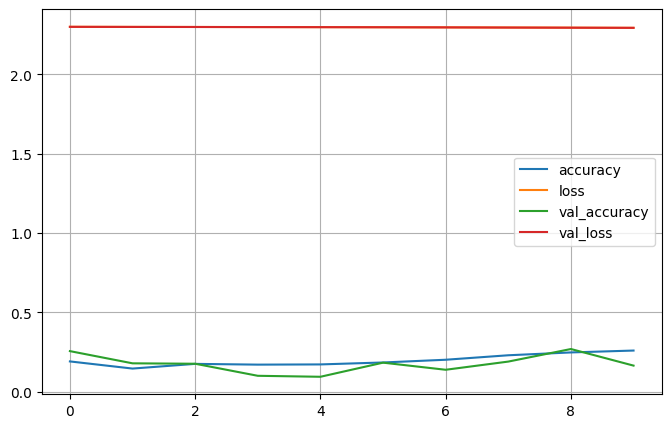

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [12]:

predictions = model.predict(test_images[:5])
predicted_classes = np.argmax(predictions, axis=1)
print("Predicciones:", predicted_classes)
print("Labels reales:", test_labels[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicciones: [7 6 6 6 6]
Labels reales: [9 2 1 1 6]


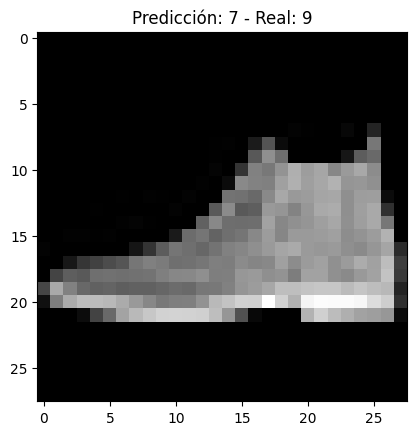

In [13]:
plt.imshow(test_images[0], cmap="gray")
plt.title(f"Predicción: {predicted_classes[0]} - Real: {test_labels[0]}")
plt.show()

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("Etiqueta real:", class_names[test_labels[0]])
print("Predicción:", class_names[predicted_classes[0]])

Etiqueta real: Ankle boot
Predicción: Sneaker
